# Cauchy's Integral Formulas

In [1]:
using Integrals
using Statistics
using Plots
using Plots: mm
using LaTeXStrings

include("../curve_plot.jl")
include("../line_segment_plot.jl")

const FIGURES_DIR = "../../figures/"

"../../figures/"

In [2]:
ϵ = 0.2
z = 0.5 + 0 * 1im
θ = pi / 3
δ = 0.1
α = asin(δ / (2 * ϵ))
z1 = z + ϵ * exp(1im * (θ - α))
z2 = z + ϵ * exp(1im * (θ + α))

function getw(z)
    R = 1
    a = real(z * exp(-1im * θ))
    b = R^2 - abs(z)^2 + a^2
    r = sqrt(b) - a

    w = z + r * exp(1im * θ)

    return w
end

w1 = getw(z1)
w2 = getw(z2)
ϕ1 = angle(w1)
ϕ2 = angle(w2)

0.6541420444117625

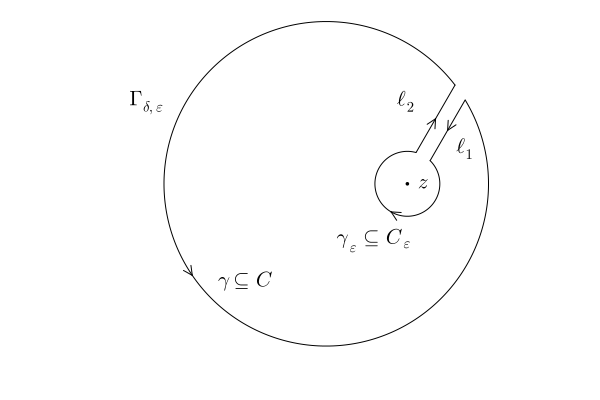

In [3]:
plot(
    aspect_ratio=:equal,
    border=:none,
    legend=nothing,
)

plot_curve!(
    t -> exp(1im * t),
    ϕ2,
    ϕ1 + 2pi,
    arrow_points=[(ϕ1 + ϕ2) / 2 + pi],
)

plot_curve!(
    t -> (1 - t) * w1 + t * z1,
    0,
    1,
    arrow_points=[0.5],
)

plot_curve!(
    t -> z + ϵ * exp(-1im * t),
    -angle(z1 - z),
    2pi - angle(z2 - z),
    arrow_points=[pi - (angle(z1 - z) + angle(z2 - z)) / 2],
)

plot_curve!(
    t -> (1 - t) * z2 + t * w2,
    0,
    1,
    arrow_points=[0.5],
)

scatter!(
    [real(z)],
    [imag(z)],
    mc=:black,
    ms=2,
    ma=1,
)

annotate!(
    real(z) + 0.1,
    imag(z),
    L"z"
)

annotate!(
    real(z) - 0.2,
    imag(z) - 0.35,
    L"\gamma_{\epsilon} \subseteq C_{\epsilon}"
)

annotate!(
    real(z) - 1,
    imag(z) - 0.6,
    L"\gamma \subseteq C"
)

annotate!(
    real(w1) + 0.0,
    imag(w1) - 0.3,
    L"\ell_1"
)

annotate!(
    real(w2) - 0.3,
    imag(w2) - 0.1,
    L"\ell_2"
)

annotate!(
    real(z) - 1.6,
    imag(z) + 0.5,
    L"\Gamma_{\delta, \epsilon}"
)

In [4]:
savefig(joinpath(FIGURES_DIR, "keyhole-for-proving-the-cauchy-integral-formula.svg"))

"/Users/isaac/Documents/math/complex-analysis/figures/keyhole-for-proving-the-cauchy-integral-formula.svg"

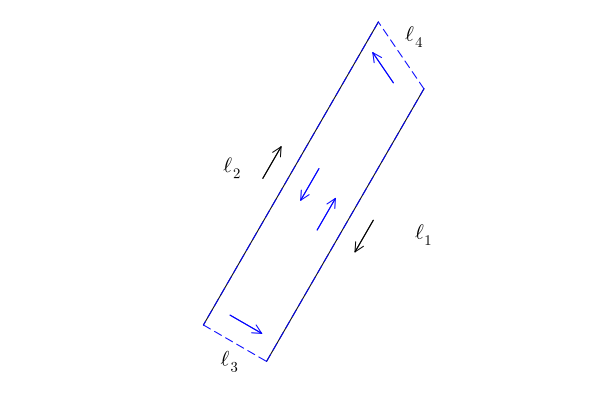

In [5]:
plot(
    aspect_ratio=:equal,
    border=:none,
    legend=nothing,
)


plot_line_segment!(
    w1,
    z1,
    arrow_distance=0.03,
    arrow_length=0.05,
    which_arrow=:left,
)

plot_line_segment!(
    z2,
    w2,
    arrow_distance=0.03,
    arrow_length=0.05,
    which_arrow=:left,
)

plot_line_segment!(
    w1,
    w2,
    arrow_distance=0.03,
    arrow_length=0.05,
    which_arrow=:left,
    linestyle=:dash,
    color=:blue,
)

plot_line_segment!(
    w2,
    z2,
    arrow_distance=0.03,
    arrow_length=0.05,
    which_arrow=:left,
    linestyle=:dash,
    color=:blue,
)

plot_line_segment!(
    z2,
    z1,
    arrow_distance=0.03,
    arrow_length=0.05,
    which_arrow=:left,
    linestyle=:dash,
    color=:blue,
)

plot_line_segment!(
    z1,
    w1,
    arrow_distance=0.03,
    arrow_length=0.05,
    which_arrow=:left,
    linestyle=:dash,
    color=:blue,
)

annotate!(
    real(w1) + 0.0,
    imag(w1) - 0.2,
    L"\ell_1"
)

annotate!(
    real(w2) - 0.2,
    imag(w2) - 0.2,
    L"\ell_2"
)

annotate!(
    real(z1) - 0.05,
    imag(z1) + 0.0,
    L"\ell_3"
)

annotate!(
    real(w2) + 0.05,
    imag(w2) - 0.02,
    L"\ell_4"
)

In [6]:
savefig(joinpath(FIGURES_DIR, "adding-a-quadrilateral-to-two-line-segments.svg"))

"/Users/isaac/Documents/math/complex-analysis/figures/adding-a-quadrilateral-to-two-line-segments.svg"

## Fresnel Integrals

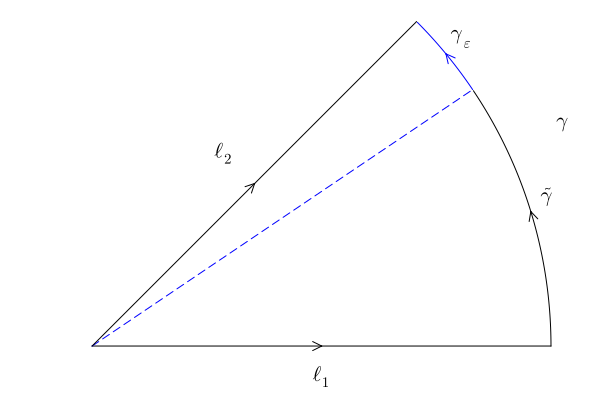

In [51]:
R = 3.0
ϵ = 1 / sqrt(R)
θ = pi / 4 - ϵ / R

plot(
    aspect_ratio=:equal,
    border=:none,
    legend=nothing,
)

plot_curve!(
    t -> t + 0im,
    0,
    R,
    arrow_points=[R / 2],
)

plot_curve!(
    t -> R * exp(1im * t),
    0,
    θ,
    arrow_points=[θ / 2],
)

plot_curve!(
    t -> R * exp(1im * t),
    θ,
    pi / 4,
    arrow_points=[(θ + pi / 4) / 2],
    color=:blue
)

plot_curve!(
    t -> t * R * exp(im * θ),
    0,
    1,
    color=:blue,
    linestyle=:dash,
)

plot_curve!(
    t -> t * R * exp(im * pi / 4),
    0,
    1,
    arrow_points=[0.5],
)

annotate!(
    R / 2,
    0 - 0.2,
    L"\ell_1"
)

annotate!(
    real(R * exp(im * pi / 4) / 2) - 0.2,
    imag(R * exp(im * pi / 4) / 2) + 0.2,
    L"\ell_2"
)

annotate!(
    real(R * exp(im * θ / 2)) + 0.1,
    imag(R * exp(im * θ / 2)) + 0.1,
    L"\tilde{\gamma}"
)

annotate!(
    real(R * exp(im * (θ + pi / 4) / 2)) + 0.1,
    imag(R * exp(im * (θ + pi / 4) / 2)) + 0.1,
    L"\gamma_\epsilon"
)

annotate!(
    real(R * exp(im * pi / 8)) + 0.3,
    imag(R * exp(im * pi / 8)) + 0.3,
    L"\gamma"
)

In [52]:
savefig(joinpath(FIGURES_DIR, "contour-for-fresnel-integrals.svg"))

"/Users/isaac/Documents/math/complex-analysis/figures/contour-for-fresnel-integrals.svg"